# 1. Basics

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Data fields:

    DBNOs - Number of enemy players knocked.
    assists - Number of enemy players this player damaged that were killed by teammates.
    boosts - Number of boost items used.
    damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
    headshotKills - Number of enemy players killed with headshots.
    heals - Number of healing items used.
    Id - Player’s Id
    killPlace - Ranking in match of number of enemy players killed.
    killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
    killStreaks - Max number of enemy players killed in a short amount of time.
    kills - Number of enemy players killed.
    longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
    matchDuration - Duration of match in seconds.
    matchId - ID to identify match. There are no matches that are in both the training and testing set.
    matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
    rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
    revives - Number of times this player revived teammates.
    rideDistance - Total distance traveled in vehicles measured in meters.
    roadKills - Number of kills while in a vehicle.
    swimDistance - Total distance traveled by swimming measured in meters.
    teamKills - Number of times this player killed a teammate.
    vehicleDestroys - Number of vehicles destroyed.
    walkDistance - Total distance traveled on foot measured in meters.
    weaponsAcquired - Number of weapons picked up.
    winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
    groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
    numGroups - Number of groups we have data for in the match.
    maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
    winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


In [ ]:
db=pd.read_csv('train_up.csv')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112876 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

Most of the features are of numerical type except for Ids and matchType.

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
db.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2a718802964d4d,c1827980642b62,9a78c7efc2795b,0,1,23.54,0,0,1,47,1245,0,0,0.0,1298,squad-fpp,29,28,0,0,0.0,0,0.00,0,0,2600.0,5,1485,0.7143
1,a4ea8117a0d762,85ed9d49426dcc,0b08d1f70bc0e4,0,0,46.04,0,0,0,58,1143,0,0,0.0,1914,duo-fpp,41,38,-1,0,0.0,0,0.00,0,0,239.0,1,1555,0.3500
2,abad453008c6f9,30338d07f9de75,2ae027da487bb2,1,0,51.60,0,0,0,62,1254,0,0,0.0,1324,squad-fpp,28,28,-1,0,0.0,0,0.00,0,0,1589.0,4,1441,0.5556
3,fba3f5b8dfccc4,206f8c8edfb9a2,a7ea160d40e9f1,2,2,165.20,0,0,1,50,0,0,0,0.0,1390,squad-fpp,28,28,1473,0,0.0,0,48.32,0,0,3180.0,8,0,0.7778
4,6892c6f3ea7930,2f573dbd371da9,c84a9837c833c7,0,0,14.69,0,0,0,37,1000,0,0,0.0,1946,normal-squad-fpp,16,16,-1,0,5218.0,0,0.00,0,0,1687.0,3,1500,0.4000


In [ ]:
db[db['winPlacePerc']==0]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
11,b2034974a5eae6,7f8a0ffe7b3f46,50399b262cc969,0,0,0.0,0,0,0,97,0,0,0,0.000,1910,duo-fpp,50,47,1474,0,0.0,0,0.0,0,0,20.38,1,0,0.0
13,0b43d9bf40bfa6,d8255aeafe81be,444401fc2ce162,0,0,0.0,0,0,0,92,1000,0,0,0.000,1339,squad-fpp,27,26,-1,0,0.0,0,0.0,0,0,0.00,0,1500,0.0
16,937c23e1be5a32,b1c1e08718728f,4f64be7803ca32,0,0,0.0,0,0,0,90,1104,0,0,0.000,1395,duo,47,43,-1,0,0.0,0,0.0,0,0,17.63,1,1509,0.0
22,f2cda8f0fef09f,d0bc76824de91d,7006827b7a3edc,0,0,100.0,1,1,0,38,0,1,1,4.124,1736,squad-fpp,27,26,1495,0,0.0,0,0.0,0,0,78.57,1,0,0.0
24,dd9569eb5c22f9,081d1e50eadbea,23569821346eb0,0,0,0.0,0,0,0,96,0,0,0,0.000,1387,duo-fpp,49,47,1478,0,0.0,0,0.0,0,0,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112783,8746632eb24343,f71548b3726a06,06040fbaaf7993,0,0,190.3,1,0,0,41,0,1,1,3.657,1890,duo,49,46,1476,0,0.0,0,0.0,0,0,80.26,1,0,0.0
3112791,7579e0e0e5b2e2,b116cdef68e439,6d42d804669259,0,0,100.0,1,0,0,43,0,1,1,4.775,1904,duo-fpp,49,47,1459,0,0.0,0,0.0,0,0,38.32,1,0,0.0
3112794,a80f5767dd1319,3d3bca89b39370,49b98e45e4e30d,0,0,0.0,0,0,0,86,1310,0,0,0.000,1761,squad-fpp,29,28,-1,0,0.0,0,0.0,0,0,0.00,0,1456,0.0
3112817,e0b64437efb1b5,daa6bbda56210b,56bffe073ba815,0,0,0.0,0,0,0,89,0,0,0,0.000,1389,squad,28,28,1455,0,0.0,0,0.0,1,0,0.00,0,0,0.0


In [ ]:
db[db['winPlacePerc']==1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
59,efa971c0a787ff,1f4af3de192970,a1a41ed99611f2,1,4,966.10,6,2,7,2,0,7,3,143.90,1825,squad-fpp,27,25,1579,0,1116.0,0,0.00,0,0,3807.0,12,0,1.0
73,82e5736555dc81,bc9be7900e5bf6,9ee24e87694e56,0,2,252.00,0,0,2,7,0,3,1,26.03,1324,squad-fpp,28,27,1480,0,0.0,0,0.00,0,0,2808.0,5,0,1.0
86,62e4b6281781a8,b2279fb8918d8b,291b2e482934c0,0,0,0.00,0,0,0,47,1000,0,0,0.00,1399,squad-fpp,27,26,-1,0,0.0,0,0.00,0,0,2786.0,5,1500,1.0
135,6bb869f00a4145,cd97480b4cc1b6,02509ed459fe8f,3,4,481.70,3,1,8,6,0,3,2,243.40,1363,squad-fpp,29,29,1341,0,0.0,0,0.00,0,0,3704.0,4,0,1.0
136,79ea12fd70834a,6d813c0129f093,b0a431ce8ebcfa,2,5,1069.00,8,1,5,3,1561,6,1,378.80,1917,squad-fpp,29,29,-1,3,1447.0,0,0.00,0,0,3251.0,7,1458,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112562,713c0052332ef1,89088e238b822f,f5e52c7fb984ae,1,2,726.50,2,2,3,1,0,7,1,214.30,1774,duo-fpp,48,45,1957,1,4970.0,0,0.00,0,0,2417.0,4,0,1.0
3112611,bf95dbd6f1c3a0,ae7b630b407e2b,78efa486cf8cd7,0,3,199.20,1,0,1,14,0,2,1,51.75,1410,squad-fpp,29,28,1546,0,0.0,0,66.83,0,0,3983.0,1,0,1.0
3112714,2755453dcc9e64,4723f33fb91e15,e8df7f0149a069,1,1,40.84,0,0,1,48,1155,0,0,0.00,1356,squad,28,28,-1,1,0.0,0,0.00,0,0,2284.0,3,1482,1.0
3112845,0e8d848e42d8f1,5b0aa7c40dc66b,9c362f31f4177a,0,4,326.60,0,1,1,8,0,3,1,28.58,1376,solo-fpp,95,92,1514,0,0.0,0,0.00,0,0,2757.0,8,0,1.0


In [ ]:
db.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112875e+06
mean,2.339239e-01,1.107759e+00,1.308017e+02,6.587818e-01,2.268834e-01,1.370783e+00,4.758207e+01,5.050118e+02,9.252460e-01,5.442054e-01,2.302410e+01,1.579534e+03,4.450919e+01,4.301134e+01,8.920588e+02,1.648183e-01,6.069331e+02,3.505119e-03,4.531070e+00,2.380917e-02,7.908442e-03,1.154895e+03,3.662081e+00,6.064482e+02,4.730654e-01
std,5.887983e-01,1.716308e+00,1.707582e+02,1.146708e+00,6.026371e-01,2.679204e+00,2.746282e+01,6.275414e+02,1.558777e+00,7.111749e-01,5.100035e+01,2.587960e+02,2.383343e+01,2.329351e+01,7.366581e+02,4.720282e-01,1.500459e+03,7.387977e-02,3.060910e+01,1.672109e-01,9.265749e-02,1.183496e+03,2.459287e+00,7.397138e+02,3.074168e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.553000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.435000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.867000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.136000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,3.818250e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.978000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.075000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.827000e+03,3.900000e+01,4.071000e+04,1.800000e+01,2.718000e+03,1.000000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.001000e+03,1.000000e+00


Here we can see that many features like 'assists', 'DBNOs', 'revives','TeamKills' have 75% or more of the values as 0. This is because these features are applicable only for team matches and the dataset is a conbimation of sol,duo and squad matches.

In [ ]:
db.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

One of the row has no 'winPlacePerc' this cannot be of any use hence we should get rid of it.

In [ ]:
db.drop(db[db['winPlacePerc'].isna()==True].index,axis=0,inplace=True)

In [ ]:
db.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# 2. Checking correlation of features with the target feature 'winPlacePerc' 

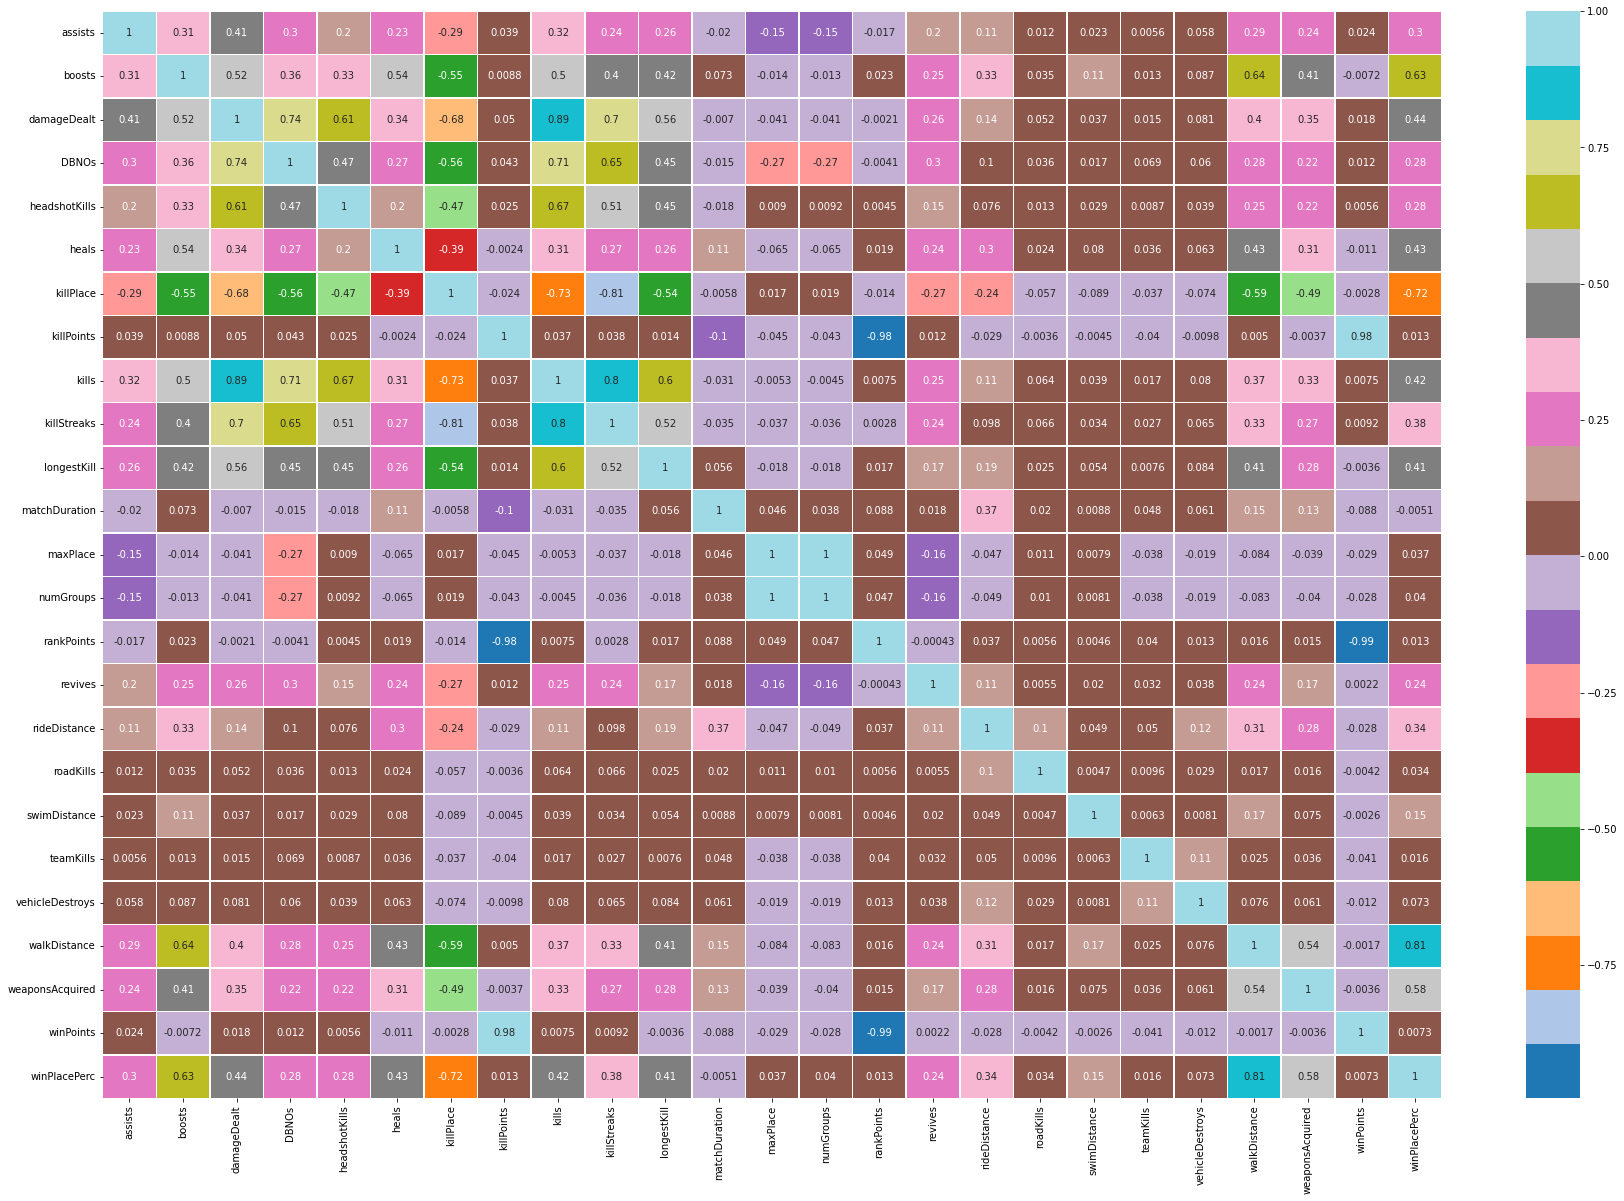

In [ ]:
plt.figure(figsize=(30,20))
dataplot = sns.heatmap(db.corr(),cmap="tab20",annot=True,linewidths=0.5)
sns.set(font_scale=1.25)
plt.show()

Here we can see that the feature 'walkDistance' has high poisitive correlation with the target variable. This is because in many match types as the play area keeps decreasing player has to move inside the circle hence any player who wins should walk some distance. 'killPlace' has high negative correlation with the the target variable. 

Even though 'kill' should greatly impace the chance of winning here correlation is less, this is because correlation can only show linear dependincy between 2 variables.


# 3. Data Cleaning and visualization

#### killPoints and rankPoints

* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

* rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.


In [ ]:
db['killPoints'].describe().apply(lambda x:format(x,'f'))

count    3112875.000000
mean         505.011968
std          627.541406
min            0.000000
25%            0.000000
50%            0.000000
75%         1171.000000
max         2170.000000
Name: killPoints, dtype: object

In [ ]:
db['rankPoints'].describe().apply(lambda x: format(x, 'f'))

count    3112875.000000
mean         892.058557
std          736.658138
min           -1.000000
25%           -1.000000
50%         1443.000000
75%         1500.000000
max         5827.000000
Name: rankPoints, dtype: object

#### kills

In [ ]:
db["kills"].describe().apply(lambda x: format(x, 'f'))

count    3112875.000000
mean           0.925246
std            1.558778
min            0.000000
25%            0.000000
50%            0.000000
75%            1.000000
max           72.000000
Name: kills, dtype: object

In [ ]:
db['kills'].quantile(0.99)

7.0

Here we can see that 99% of the players have less than or equal to 7 kills. While on average a player will make 0.92 kills per match. Maximum number of kills recorded is 72.

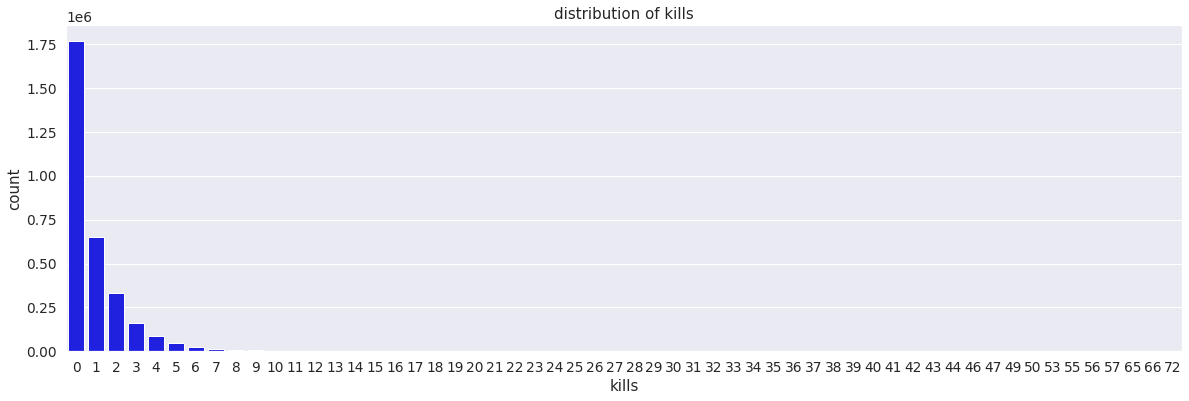

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=db, x=db['kills'],color='blue')
plt.title('distribution of kills')
plt.show()

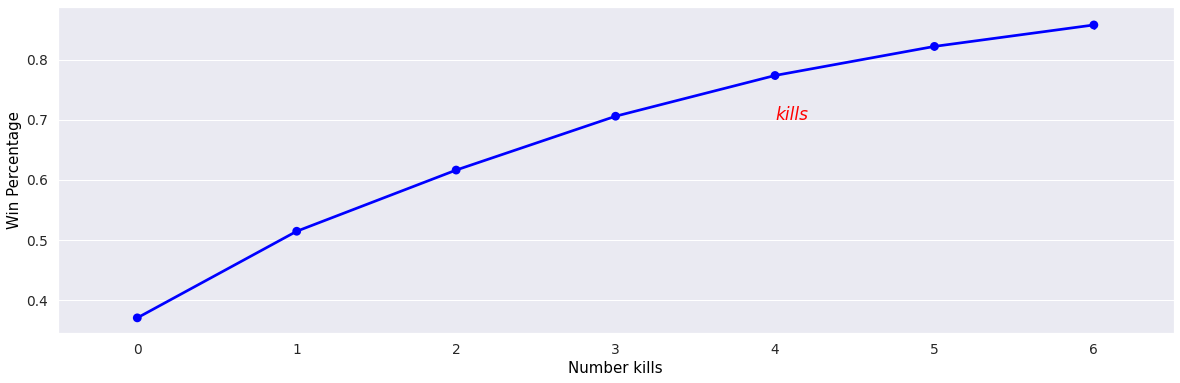

In [ ]:
data = db.sample(500000)
data = data[data['kills'] < data['kills'].quantile(0.99)]
f,ax1 = plt.subplots(figsize =(20,6))
sns.pointplot(x='kills',y='winPlacePerc',data=data,color='blue')
plt.text(4,0.7,'kills',color='red',fontsize = 17,style = 'italic')
plt.xlabel('Number kills',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.show()

from the plot we can see the number of kills influence the win Percentage 

In [ ]:
db['kills'].describe()

count    3.112875e+06
mean     9.252463e-01
std      1.558778e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


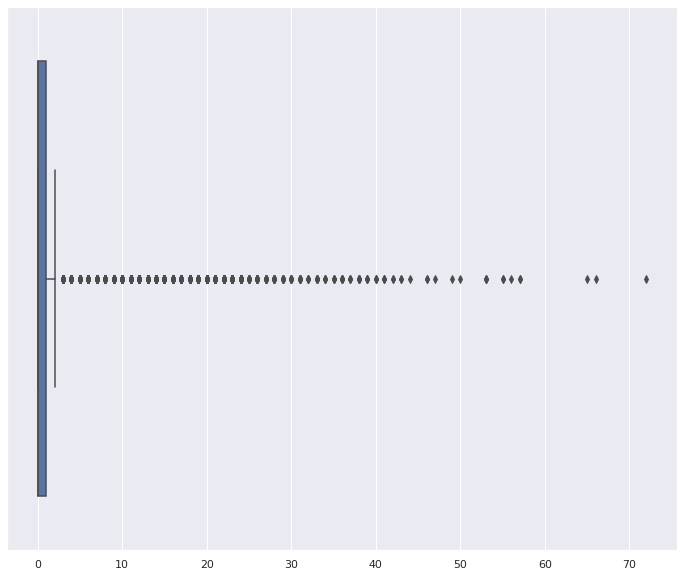

In [ ]:
x=db['kills'].values
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x)

In [ ]:
db['kills'].quantile(0.9999)

21.0

In [ ]:
db.drop(db[db['kills'] > 40].index, inplace=True)

99.99% of the players have 21 kills or less, but remaining 0.01% of the players might be very good at the game or cheating. We can drop these outliers.

#### longest kill

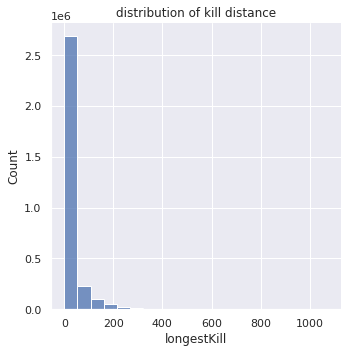

<Figure size 1440x432 with 0 Axes>

In [ ]:
sns.displot(db['longestKill'],bins=20)
plt.title('distribution of kill distance')
plt.figure(figsize=(20,6))
plt.show()

In [ ]:
db["longestKill"].describe().apply(lambda x: format(x, 'f'))

count    3112851.000000
mean          23.023091
std           50.998650
min            0.000000
25%            0.000000
50%            0.000000
75%           21.360000
max         1075.000000
Name: longestKill, dtype: object

In [ ]:
db['longestKill'].quantile(0.999)

415.4

As we can see 99.9% of the players will have the logestKill less than 416. Maximum value is 1075 which is almost impossible. This indicates that either the player is cheating or he knocked down a player and travelled very long distance. Hence we can easly get rid of these outliers.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


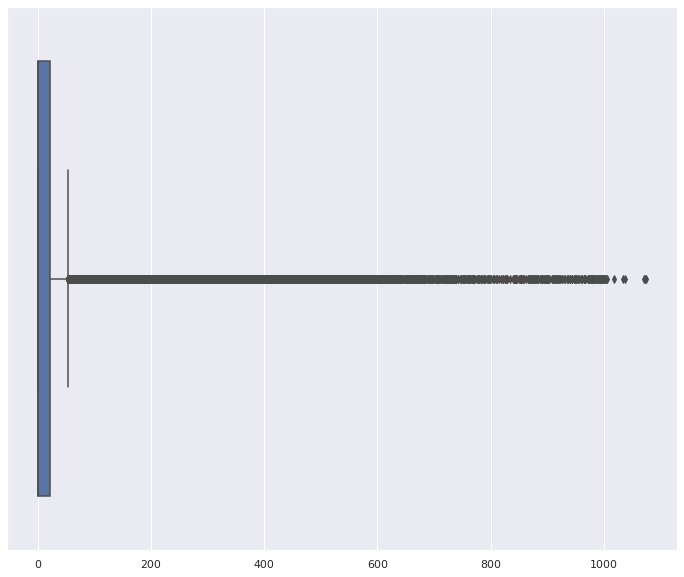

In [ ]:
x=db['longestKill'].values
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x)

In [ ]:
db.drop(db[db['longestKill']>=500].index,inplace=True)

#### Travel distances

<Figure size 864x288 with 0 Axes>

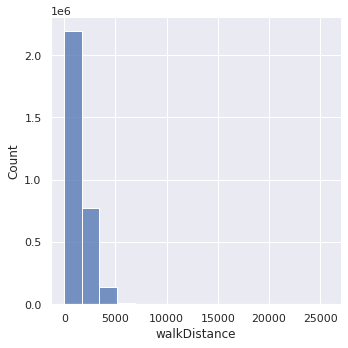

In [ ]:
plt.figure(figsize=(12,4))
sns.displot(db['walkDistance'], bins=15)
plt.show()

<Figure size 864x288 with 0 Axes>

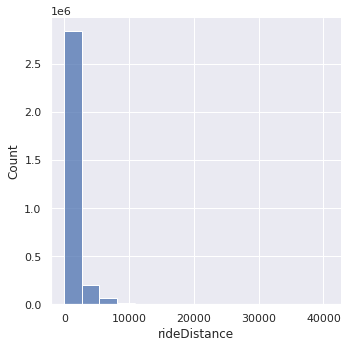

In [ ]:
plt.figure(figsize=(12,4))
sns.displot(db['rideDistance'], bins=15)
plt.show()

<Figure size 864x288 with 0 Axes>

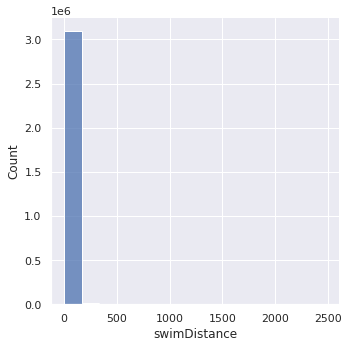

In [ ]:
plt.figure(figsize=(12,4))
sns.displot(db['swimDistance'], bins=15)
plt.show()

In [ ]:
db['walkDistance'].quantile(0.9999)

9096.390999995172

In [ ]:
db['rideDistance'].quantile(0.9999)

15353.563999980688

In [ ]:
db['swimDistance'].quantile(0.9999)

783.9747399993241

We can remove these outliers as it is bit suspicious

In [ ]:
db.drop(db[db['walkDistance']>=10000].index,inplace=True)
db.drop(db[db['rideDistance']>=16000].index,inplace=True)
db.drop(db[db['swimDistance']>=800].index,inplace=True)

In [ ]:
winners=db.query("winPlacePerc ==1")
loosers=db.query("winPlacePerc<1")
winners.count()
plot2sample=loosers.sample(n=10000)
plotsample=winners.sample(n=10000)

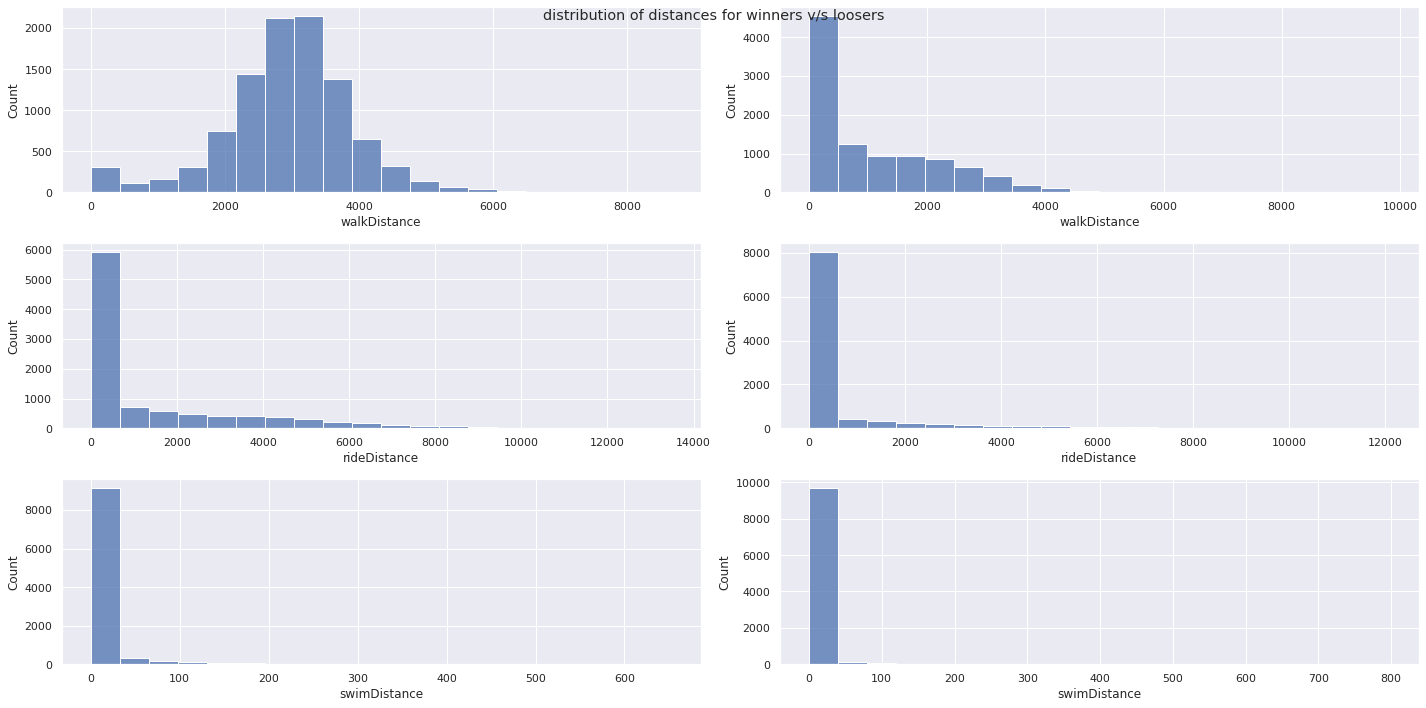

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,10)) # create 2x3 array of subplots
sns.histplot(plotsample['walkDistance'],bins=20, ax=axes[0,0])
sns.histplot(plotsample['rideDistance'],bins=20, ax=axes[1,0])
sns.histplot(plotsample['swimDistance'],bins=20, ax=axes[2,0])
sns.histplot(plot2sample['walkDistance'],bins=20, ax=axes[0,1])
sns.histplot(plot2sample['rideDistance'],bins=20, ax=axes[1,1])
sns.histplot(plot2sample['swimDistance'],bins=20, ax=axes[2,1])
fig.suptitle('distribution of distances for winners v/s loosers')
fig.tight_layout()

plt.show()

We can observe that winners should travel more. Also we can observe that travelling more will not gurantee win.

Also, as all the 3 features are needed for the model and are similar we can create a new feature 'totalDistance' as combination of all the 3 features.

In [ ]:
db['totalDistance']=db['walkDistance']+db['swimDistance']+db['rideDistance']
winners=db.query("winPlacePerc ==1")
loosers=db.query("winPlacePerc<1")
plot2sample=loosers.sample(n=10000)
plotsample=winners.sample(n=10000)

In [ ]:
db['match_walkPerc'] = db['walkDistance']/db['matchDuration']*100
db['kills_walkPerc'] = db['kills']/(db['walkDistance']+1)*100
db['damage_walkPrec'] = db['damageDealt']/(db['walkDistance']+1)*100
db['weaponacq_walkPerc'] = db['weaponsAcquired']/(db['walkDistance']+1)*100

In [ ]:
columns_drop = ['rideDistance','swimDistance','walkDistance']
db.drop(columns=columns_drop,inplace=True)

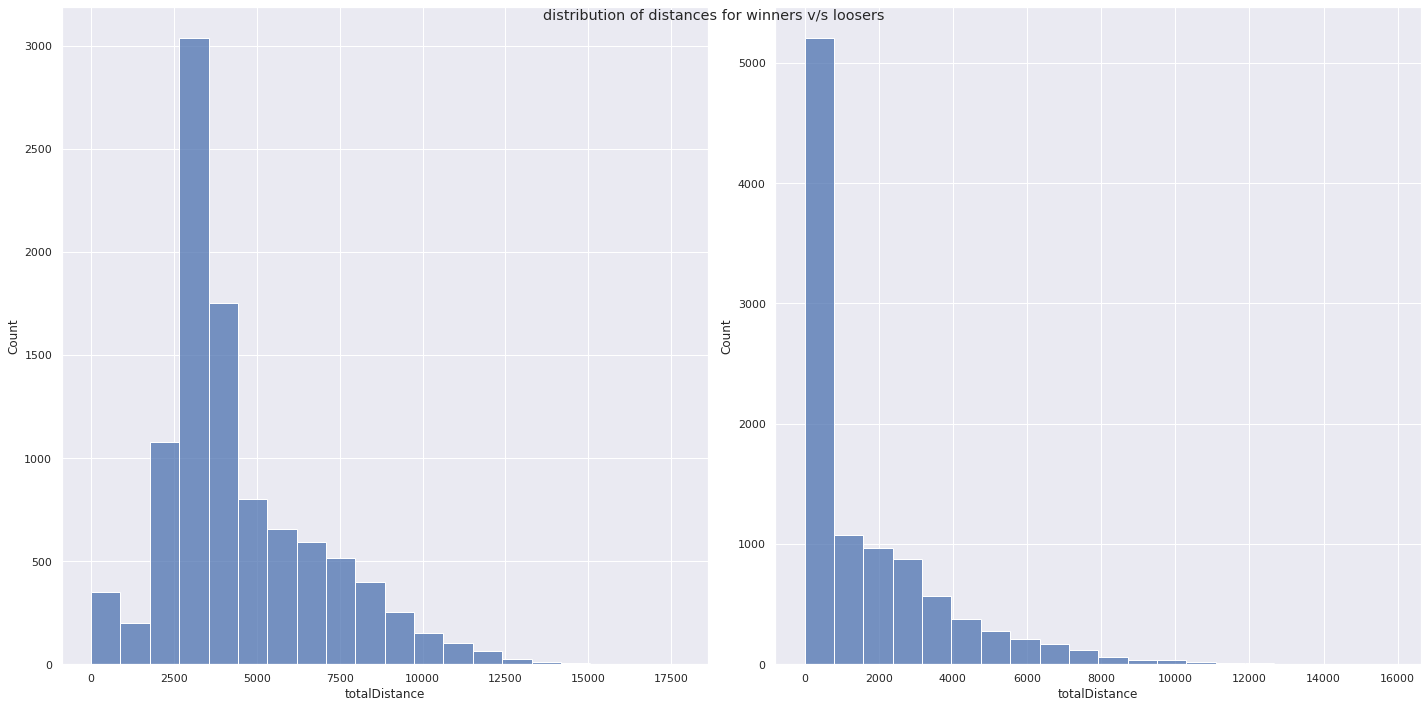

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10)) # create 2x3 array of subplots
sns.histplot(plotsample['totalDistance'],bins=20, ax=axes[0])
sns.histplot(plot2sample['totalDistance'],bins=20, ax=axes[1])
fig.suptitle('distribution of distances for winners v/s loosers')
fig.tight_layout()
plt.show()

#### roadkill 

In [ ]:
db['roadKills'].quantile(0.9999)

3.0

We can see that 99.99% of players have less than or equal to 3 road kills. 

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


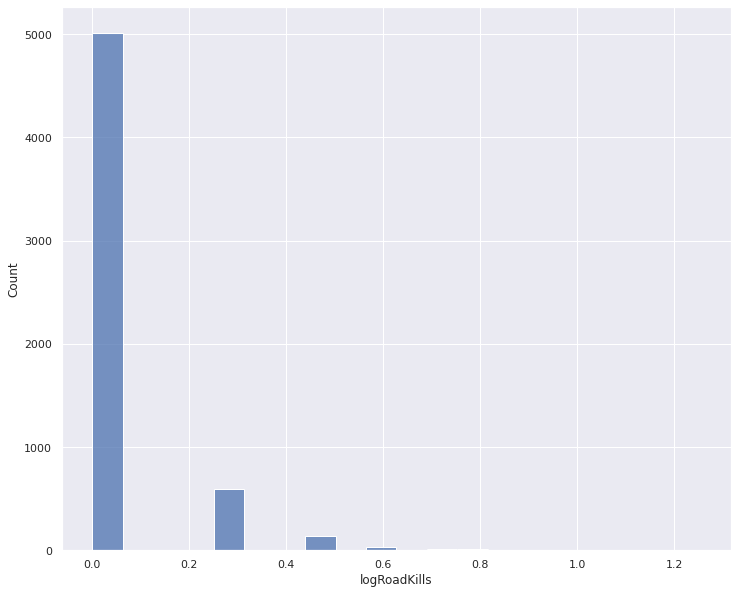

In [ ]:
plotsample=db.sample(n=2000000)
plotsample['logRoadKills'] = np.log10(plotsample['roadKills'])
plotsample['logRoadKills'].fillna(0)
sns.histplot(plotsample['logRoadKills'],bins=20)

In [ ]:
db[db['roadKills']>10]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,totalDistance,match_walkPerc,kills_walkPerc,damage_walkPrec,weaponacq_walkPerc
1877252,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,1114,20,18,64.290,1970,solo,38,20,-1,0,18,0,0,4,1568,1.0000,5876.000,159.898477,0.634719,65.820374,0.126944
2210262,34193085975338,bd7d50fa305700,a22354d036b3d6,0,0,1102.0,0,0,0,1,1497,11,11,0.000,1946,solo,88,77,-1,0,11,0,0,5,1533,0.4713,4934.600,41.963001,1.345401,134.784736,0.611546
2918711,c3e444f7d1289f,489dd6d1f2b3bb,4797482205aaa4,0,0,1246.0,0,0,0,1,1403,14,13,7.181,1456,solo,92,80,-1,0,14,0,0,0,1371,0.4286,1282.302,87.706044,1.095462,97.496088,0.000000


In [ ]:
db.drop(db[db['roadKills']>=10].index,inplace=True)

#### removing cheaters[killing without moving]

In [ ]:
db['cheater']= ((db['kills'] > 0) & (db['totalDistance'] == 0))
db[db['cheater']==True].count()

Id                    1067
groupId               1067
matchId               1067
assists               1067
boosts                1067
damageDealt           1067
DBNOs                 1067
headshotKills         1067
heals                 1067
killPlace             1067
killPoints            1067
kills                 1067
killStreaks           1067
longestKill           1067
matchDuration         1067
matchType             1067
maxPlace              1067
numGroups             1067
rankPoints            1067
revives               1067
roadKills             1067
teamKills             1067
vehicleDestroys       1067
weaponsAcquired       1067
winPoints             1067
winPlacePerc          1067
totalDistance         1067
match_walkPerc        1067
kills_walkPerc        1067
damage_walkPrec       1067
weaponacq_walkPerc    1067
cheater               1067
dtype: int64

There are 1067 players who have made more than one kill without movement. All these data points can be removed

In [ ]:
db.drop(db[db['cheater']==True].index,inplace=True)

In [ ]:
db.drop(columns='cheater',inplace=True)

#### heals and boosts

both heals and boosts are used by players to restore lost health during a match. 

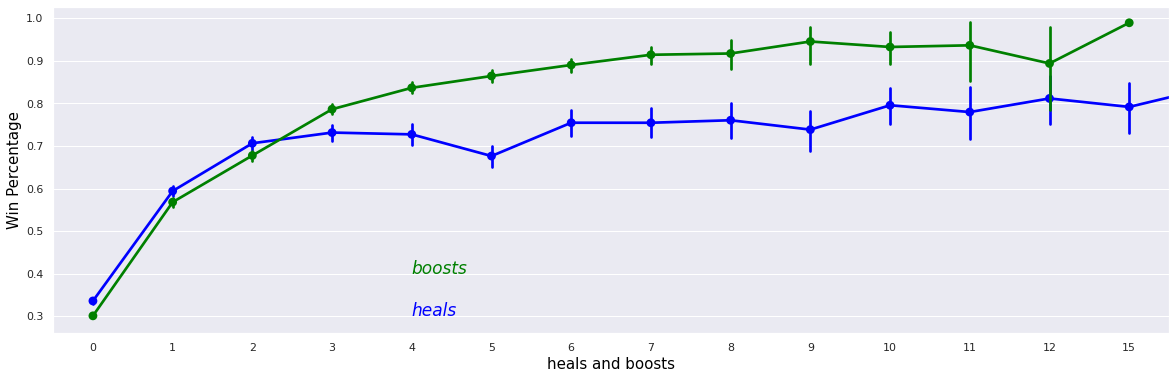

In [ ]:
data=db.sample(n=10000)
f,ax1 = plt.subplots(figsize =(20,6))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='blue',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='green',alpha=0.8)
plt.text(4,0.3,'heals',color='blue',fontsize = 17,style = 'italic')
plt.text(4,0.4,'boosts',color='green',fontsize=17,style='italic')
plt.xlabel('heals and boosts',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.show()

In [ ]:
db['boosts'].quantile(0.9999)

13.0

In [ ]:
db['heals'].quantile(0.9999)

33.0

In [ ]:
db[db['boosts']>15].count()

Id                    55
groupId               55
matchId               55
assists               55
boosts                55
damageDealt           55
DBNOs                 55
headshotKills         55
heals                 55
killPlace             55
killPoints            55
kills                 55
killStreaks           55
longestKill           55
matchDuration         55
matchType             55
maxPlace              55
numGroups             55
rankPoints            55
revives               55
roadKills             55
teamKills             55
vehicleDestroys       55
weaponsAcquired       55
winPoints             55
winPlacePerc          55
totalDistance         55
match_walkPerc        55
kills_walkPerc        55
damage_walkPrec       55
weaponacq_walkPerc    55
dtype: int64

In [ ]:
db.drop(db[db['boosts']>15].index,inplace=True)

In [ ]:
db[db['heals']>35].count()

Id                    195
groupId               195
matchId               195
assists               195
boosts                195
damageDealt           195
DBNOs                 195
headshotKills         195
heals                 195
killPlace             195
killPoints            195
kills                 195
killStreaks           195
longestKill           195
matchDuration         195
matchType             195
maxPlace              195
numGroups             195
rankPoints            195
revives               195
roadKills             195
teamKills             195
vehicleDestroys       195
weaponsAcquired       195
winPoints             195
winPlacePerc          195
totalDistance         195
match_walkPerc        195
kills_walkPerc        195
damage_walkPrec       195
weaponacq_walkPerc    195
dtype: int64

In [ ]:
db.drop(db[db['heals']>35].index,inplace=True)

In [ ]:
db['recover']=db['heals']+db['boosts']

In [ ]:
columns_drop = [ 'heals','boosts']
db.drop(columns=columns_drop,inplace=True)

#### weapon supplies

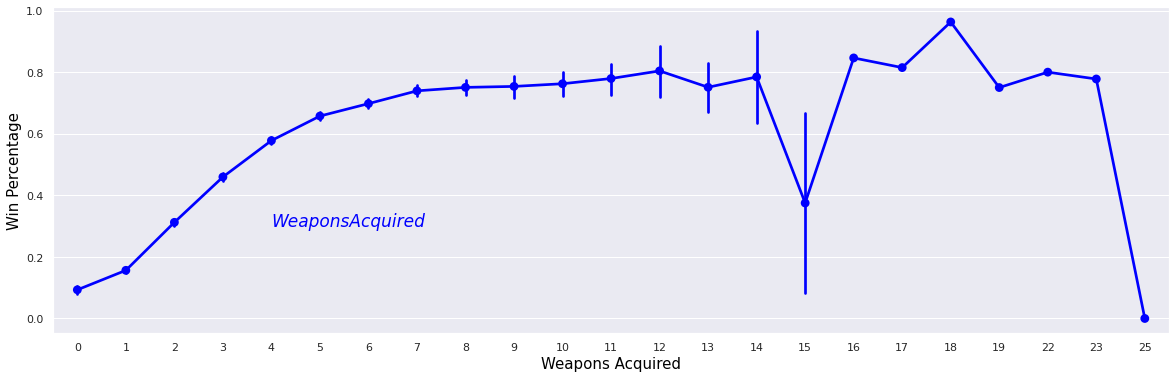

In [ ]:
data=db.sample(n=10000)
f,ax1 = plt.subplots(figsize =(20,6))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.3,'WeaponsAcquired',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Weapons Acquired',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.show()

In [ ]:
db['weaponsAcquired'].quantile(0.9999)

37.0

In [ ]:
db[db['weaponsAcquired']>35].count()

Id                    348
groupId               348
matchId               348
assists               348
damageDealt           348
DBNOs                 348
headshotKills         348
killPlace             348
killPoints            348
kills                 348
killStreaks           348
longestKill           348
matchDuration         348
matchType             348
maxPlace              348
numGroups             348
rankPoints            348
revives               348
roadKills             348
teamKills             348
vehicleDestroys       348
weaponsAcquired       348
winPoints             348
winPlacePerc          348
totalDistance         348
match_walkPerc        348
kills_walkPerc        348
damage_walkPrec       348
weaponacq_walkPerc    348
recover               348
dtype: int64

In [ ]:
db.drop(db[db['weaponsAcquired']>35].index,inplace=True)

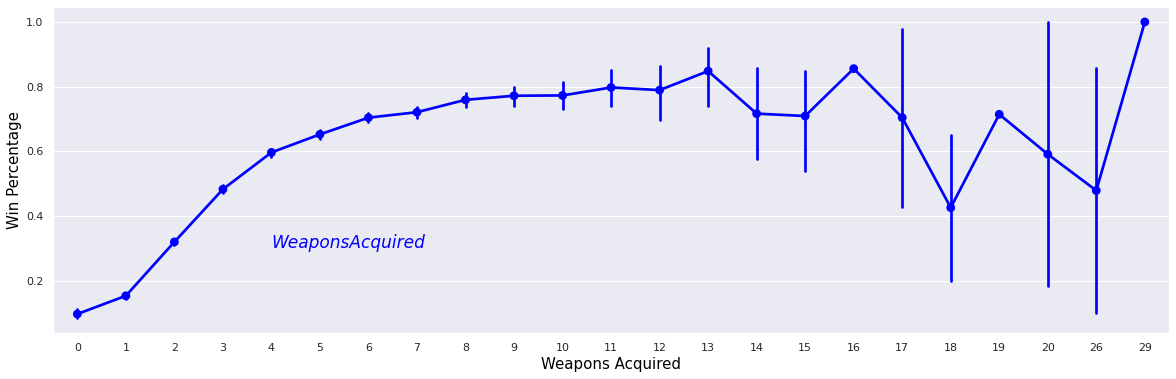

In [ ]:
data=db.sample(n=10000)
f,ax1 = plt.subplots(figsize =(20,6))
sns.pointplot(x='weaponsAcquired',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.3,'WeaponsAcquired',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Weapons Acquired',fontsize = 15,color='black')
plt.ylabel('Win Percentage',fontsize = 15,color='black')
plt.show()

#### matchType

In [ ]:
db['matchType'].unique() 

array(['squad-fpp', 'duo-fpp', 'normal-squad-fpp', 'squad', 'solo-fpp',
       'duo', 'solo', 'normal-duo-fpp', 'flaretpp', 'crashtpp',
       'normal-solo', 'crashfpp', 'normal-squad', 'normal-solo-fpp',
       'normal-duo', 'flarefpp'], dtype=object)

In [ ]:
squad=db.loc[db['matchType']=='squad-fpp']
solo=db.loc[db['matchType']=='solo-fpp']

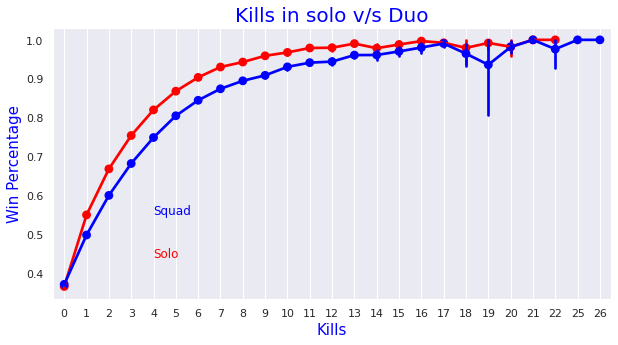

In [ ]:
f,ax1 = plt.subplots(figsize =(10,5))
sns.pointplot(x='kills',y='winPlacePerc',data=solo,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squad,color='blue',alpha=0.8)
plt.text(4,0.44,'Solo',color='red')
plt.text(4,0.55,'Squad',color='blue')
plt.xlabel('Kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Kills in solo v/s Duo',fontsize = 20,color='blue')
plt.grid()

We can see that there are multiple type of matches and the techniques used by players depend on the matchType , like in solo match a player will have more kills compared to a squad match.

In [ ]:
solo = ['solo','solo-fpp','normal-solo-fpp','normal-solo']
duo = ['duo','duo-fpp','normal-duo-fpp','normal-duo']
squad = ['squad','squad-fpp','normal-squad-fpp','normal-squad']
other = ['crashfpp','flaretpp','crashtpp','flarefpp']
db['teamSize'] = db.groupby('groupId')['groupId'].transform('count')


In [ ]:
db['normMatchType'] = 'none'
db.loc[db.eval("teamSize==1 & matchType in @solo & normMatchType=='none'"),'normMatchType'] = 'solo'
db.loc[db.eval("teamSize<=2 & matchType in @duo & normMatchType=='none'"),'normMatchType'] = 'duo'
db.loc[db.eval("teamSize<=4 & matchType in @squad & normMatchType=='none'"),'normMatchType'] = 'squad'
db.loc[db.eval("teamSize>0 & normMatchType=='none'"),'normMatchType'] = 'other'

In [ ]:
db['MatchType']=db['normMatchType'].astype('category')
db.drop('matchType',axis=1,inplace=True)
db.drop('normMatchType',axis=1,inplace=True)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3109242 entries, 0 to 3112875
Data columns (total 31 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Id                  object  
 1   groupId             object  
 2   matchId             object  
 3   assists             int64   
 4   damageDealt         float64 
 5   DBNOs               int64   
 6   headshotKills       int64   
 7   killPlace           int64   
 8   killPoints          int64   
 9   kills               int64   
 10  killStreaks         int64   
 11  longestKill         float64 
 12  matchDuration       int64   
 13  maxPlace            int64   
 14  numGroups           int64   
 15  rankPoints          int64   
 16  revives             int64   
 17  roadKills           int64   
 18  teamKills           int64   
 19  vehicleDestroys     int64   
 20  weaponsAcquired     int64   
 21  winPoints           int64   
 22  winPlacePerc        float64 
 23  totalDistance       float64 
 24

In [ ]:
db.tail()

,Id,groupId,matchId,assists,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,totalDistance,match_walkPerc,kills_walkPerc,damage_walkPrec,weaponacq_walkPerc,recover,teamSize,MatchType
3112871,9ead1df8f955d9,6cfd7699a9e60c,03b2aaf71899dd,0,0.0,0,0,55,0,0,0,0.00,1301,29,26,1548,0,0,0,0,1,0,0.4286,29.34,2.255188,0.000000,0.000000,3.295979,0,3,squad
3112872,82acea6cb048f0,9895b84ebc64b6,873b1d714c226c,0,43.0,0,0,49,0,0,0,0.00,1423,49,48,1528,0,0,0,0,4,0,0.7708,2264.00,159.100492,0.000000,1.898455,0.176600,2,2,duo
3112873,01e620d3704627,42f7b571904f80,add3b3fb4bfa0a,2,191.8,3,0,26,0,1,1,58.93,1524,28,27,1495,0,0,0,0,6,0,0.8889,3585.00,235.236220,0.027886,5.348578,0.167317,1,4,squad
3112874,b1790bed0f85ff,bafd20803d881e,d3396343532c1c,1,243.0,2,0,20,1287,2,1,12.21,1380,49,47,-1,0,0,0,0,2,1418,0.2083,132.80,9.623188,1.494768,181.614350,1.494768,1,3,other
3112875,79a6cac5eb5741,d5b693a6dc9bd6,9de4e3acb466c4,0,192.5,0,0,53,1245,0,0,0.00,1371,49,49,-1,0,0,0,0,7,1437,0.7083,2277.00,166.083151,0.000000,8.450395,0.307287,2,2,duo


#### Match Duration

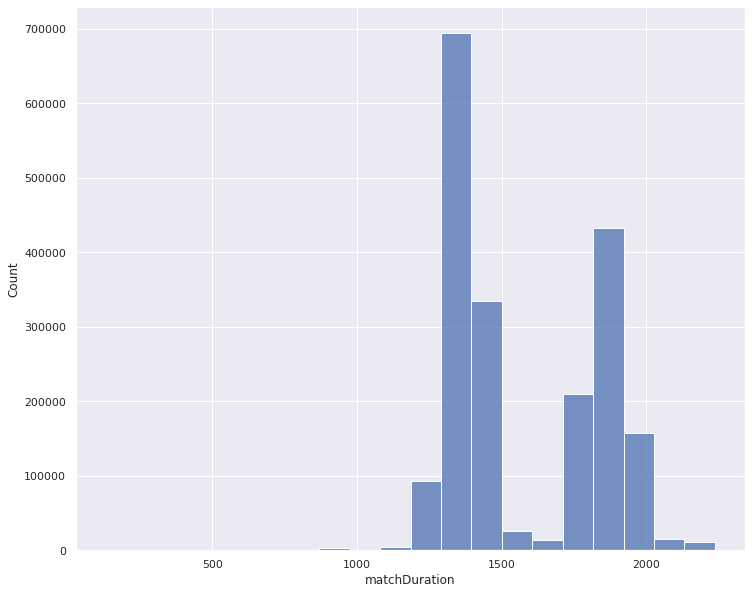

In [ ]:
plotsample=db.sample(n=2000000)
sns.histplot(plotsample['matchDuration'],bins=20)

We can see 2 distinct bell curves in the graph which are nothing but for solo and squad matches

In [ ]:
db['matchDuration'].min()

133

In [ ]:
db['matchDuration'].describe().apply(lambda x: format(x, 'f'))

count    3109242.000000
mean        1579.593230
std          258.475988
min          133.000000
25%         1367.000000
50%         1438.000000
75%         1851.000000
max         2237.000000
Name: matchDuration, dtype: object

In [ ]:
db['matchDuration'].quantile(0.001)

849.0

In [ ]:
db[db['matchDuration']<500].count()

Id                    467
groupId               467
matchId               467
assists               467
damageDealt           467
DBNOs                 467
headshotKills         467
killPlace             467
killPoints            467
kills                 467
killStreaks           467
longestKill           467
matchDuration         467
maxPlace              467
numGroups             467
rankPoints            467
revives               467
roadKills             467
teamKills             467
vehicleDestroys       467
weaponsAcquired       467
winPoints             467
winPlacePerc          467
totalDistance         467
match_walkPerc        467
kills_walkPerc        467
damage_walkPrec       467
weaponacq_walkPerc    467
recover               467
teamSize              467
MatchType             467
dtype: int64

In [ ]:
db.drop(db[db['matchDuration']<500].index,inplace=True)

In [ ]:
db.head()

,Id,groupId,matchId,assists,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,totalDistance,match_walkPerc,kills_walkPerc,damage_walkPrec,weaponacq_walkPerc,recover,teamSize,MatchType
0,2a718802964d4d,c1827980642b62,9a78c7efc2795b,0,23.54,0,0,47,1245,0,0,0.0,1298,29,28,0,0,0,0,0,5,1485,0.7143,2600.00,200.308166,0.0,0.905037,0.192234,2,3,squad
1,a4ea8117a0d762,85ed9d49426dcc,0b08d1f70bc0e4,0,46.04,0,0,58,1143,0,0,0.0,1914,41,38,-1,0,0,0,0,1,1555,0.3500,239.00,12.486938,0.0,19.183333,0.416667,0,4,other
2,abad453008c6f9,30338d07f9de75,2ae027da487bb2,1,51.60,0,0,62,1254,0,0,0.0,1324,28,28,-1,0,0,0,0,4,1441,0.5556,1589.00,120.015106,0.0,3.245283,0.251572,0,3,squad
3,fba3f5b8dfccc4,206f8c8edfb9a2,a7ea160d40e9f1,2,165.20,0,0,50,0,0,0,0.0,1390,28,28,1473,0,0,0,0,8,0,0.7778,3228.32,228.776978,0.0,5.193335,0.251493,3,2,squad
4,6892c6f3ea7930,2f573dbd371da9,c84a9837c833c7,0,14.69,0,0,37,1000,0,0,0.0,1946,16,16,-1,0,0,0,0,3,1500,0.4000,6905.00,86.690647,0.0,0.870261,0.177725,0,2,squad


In [ ]:
db.shape
db.drop('Id',axis=1,inplace=True)

In [ ]:
db.head()

,groupId,matchId,assists,damageDealt,DBNOs,headshotKills,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,roadKills,teamKills,vehicleDestroys,weaponsAcquired,winPoints,winPlacePerc,totalDistance,match_walkPerc,kills_walkPerc,damage_walkPrec,weaponacq_walkPerc,recover,teamSize,MatchType
0,c1827980642b62,9a78c7efc2795b,0,23.54,0,0,47,1245,0,0,0.0,1298,29,28,0,0,0,0,0,5,1485,0.7143,2600.00,200.308166,0.0,0.905037,0.192234,2,3,squad
1,85ed9d49426dcc,0b08d1f70bc0e4,0,46.04,0,0,58,1143,0,0,0.0,1914,41,38,-1,0,0,0,0,1,1555,0.3500,239.00,12.486938,0.0,19.183333,0.416667,0,4,other
2,30338d07f9de75,2ae027da487bb2,1,51.60,0,0,62,1254,0,0,0.0,1324,28,28,-1,0,0,0,0,4,1441,0.5556,1589.00,120.015106,0.0,3.245283,0.251572,0,3,squad
3,206f8c8edfb9a2,a7ea160d40e9f1,2,165.20,0,0,50,0,0,0,0.0,1390,28,28,1473,0,0,0,0,8,0,0.7778,3228.32,228.776978,0.0,5.193335,0.251493,3,2,squad
4,2f573dbd371da9,c84a9837c833c7,0,14.69,0,0,37,1000,0,0,0.0,1946,16,16,-1,0,0,0,0,3,1500,0.4000,6905.00,86.690647,0.0,0.870261,0.177725,0,2,squad


In [ ]:
db.shape

(3108775, 30)

#### Handling groups

In [ ]:
df=db.groupby(['matchId','groupId'],as_index=False).agg(

    assists=pd.NamedAgg(column="assists",aggfunc="sum"),

    sumdamageDealt=pd.NamedAgg(column="damageDealt",aggfunc="sum"),

    sumDBNOs=pd.NamedAgg(column="DBNOs",aggfunc="sum"),

    sumheadshotKills=pd.NamedAgg(column="headshotKills",aggfunc="sum"),

#     minkillPlace=pd.NamedAgg(column="killPlace",aggfunc="min"),

    maxkillPlace=pd.NamedAgg(column="killPlace",aggfunc="max"),

#     meankillPlace=pd.NamedAgg(column="killPlace",aggfunc="mean"),

    meankillPoints=pd.NamedAgg(column="killPoints",aggfunc="mean"),

    sumkills=pd.NamedAgg(column="kills",aggfunc="sum"),

#     minkillStreaks=pd.NamedAgg(column="killStreaks",aggfunc="min"),

    maxkillStreaks=pd.NamedAgg(column="killStreaks",aggfunc="max"),

#     meankillStreaks=pd.NamedAgg(column="killStreaks",aggfunc="mean"),

#     minlongestKill=pd.NamedAgg(column="longestKill",aggfunc="min"),

    maxlongestKill=pd.NamedAgg(column="longestKill",aggfunc="max"),

#     meanlongestKill=pd.NamedAgg(column="longestKill",aggfunc="mean"),

    maxPlace=pd.NamedAgg(column="maxPlace",aggfunc="first"),
    
    summatch_walkPerc=pd.NamedAgg(column="match_walkPerc",aggfunc="sum"),
    
    sumkills_walkPerc=pd.NamedAgg(column="kills_walkPerc",aggfunc="sum"),
    
    sumdamage_walkPrec=pd.NamedAgg(column="damage_walkPrec",aggfunc="sum"),
    
    sumweaponacq_walkPerc=pd.NamedAgg(column="weaponacq_walkPerc",aggfunc="sum"),

    numGroups=pd.NamedAgg(column="numGroups",aggfunc="first"),

    meanrankPoints=pd.NamedAgg(column="rankPoints",aggfunc="mean"),

    sumrevives=pd.NamedAgg(column="revives",aggfunc="sum"),

    sumroadKills=pd.NamedAgg(column="roadKills",aggfunc="sum"),

    sumteamKills=pd.NamedAgg(column="teamKills",aggfunc="sum"),

    sumvehicleDestroys=pd.NamedAgg(column="vehicleDestroys",aggfunc="sum"),

    sumweaponsAcquired=pd.NamedAgg(column="weaponsAcquired",aggfunc="sum"),

    meanwinPoints=pd.NamedAgg(column="winPoints",aggfunc="mean"),

    sumtotalDistance=pd.NamedAgg(column="totalDistance",aggfunc="sum"),

    sumrecover=pd.NamedAgg(column="recover",aggfunc="sum"),

    matchDuration=pd.NamedAgg(column="matchDuration",aggfunc="first"),

    matchType=pd.NamedAgg(column="MatchType",aggfunc="first"),

    winPlacePerc=pd.NamedAgg(column="winPlacePerc",aggfunc="max"),
    
    teamSize=pd.NamedAgg(column="teamSize",aggfunc="first")
     )

In [ ]:
df.shape

(1719674, 30)

In [ ]:
df.count()

matchId                  1719674
groupId                  1719674
assists                  1719674
sumdamageDealt           1719674
sumDBNOs                 1719674
sumheadshotKills         1719674
maxkillPlace             1719674
meankillPoints           1719674
sumkills                 1719674
maxkillStreaks           1719674
maxlongestKill           1719674
maxPlace                 1719674
summatch_walkPerc        1719674
sumkills_walkPerc        1719674
sumdamage_walkPrec       1719674
sumweaponacq_walkPerc    1719674
numGroups                1719674
meanrankPoints           1719674
sumrevives               1719674
sumroadKills             1719674
sumteamKills             1719674
sumvehicleDestroys       1719674
sumweaponsAcquired       1719674
meanwinPoints            1719674
sumtotalDistance         1719674
sumrecover               1719674
matchDuration            1719674
matchType                1719674
winPlacePerc             1719674
teamSize                 1719674
dtype: int

In [ ]:
df.head()

,matchId,groupId,assists,sumdamageDealt,sumDBNOs,sumheadshotKills,maxkillPlace,meankillPoints,sumkills,maxkillStreaks,maxlongestKill,maxPlace,summatch_walkPerc,sumkills_walkPerc,sumdamage_walkPrec,sumweaponacq_walkPerc,numGroups,meanrankPoints,sumrevives,sumroadKills,sumteamKills,sumvehicleDestroys,sumweaponsAcquired,meanwinPoints,sumtotalDistance,sumrecover,matchDuration,matchType,winPlacePerc,teamSize
0,0000a43bce5eec,18b16ec699d8b6,0,19.35,0,0,61,1065.0,0,0,0.00,28,14.071322,0.00000,10.162815,0.525210,28,0.0,0,0,0,0,1,1484.00,189.400,1,1346,squad,0.3333,1
1,0000a43bce5eec,236ab9e9c081b9,0,209.24,2,0,93,1401.5,0,0,0.00,28,5.859658,0.00000,915.618692,23.278392,28,0.0,0,0,0,0,3,1480.75,78.871,0,1346,squad,0.0370,4
2,0000a43bce5eec,3a6addfa0df938,0,0.00,0,0,94,1306.0,0,0,0.00,28,0.000000,0.00000,0.000000,0.000000,28,0.0,0,0,0,0,0,1413.00,0.000,0,1346,squad,0.0000,1
3,0000a43bce5eec,4bf06994bd4c9a,0,23.40,0,0,60,1178.0,0,0,0.00,28,83.068351,0.00000,3.033446,2.129172,28,0.0,0,0,0,0,14,1458.00,1118.100,1,1346,squad,0.3704,2
4,0000a43bce5eec,4d1bbbc19b9084,2,681.90,5,2,23,1504.0,6,2,33.42,28,489.227340,0.18064,20.559620,0.242943,28,0.0,0,0,0,0,8,1501.00,6756.058,9,1346,squad,1.0000,2


# 4. Feature Selection using Mutual Information

In [ ]:
columns_drop = [ 'groupId','matchId']
df.drop(columns=columns_drop,inplace=True)
df_sample=df.sample(200000)

In [ ]:
y_train = df['winPlacePerc']
y_sample=df_sample['winPlacePerc']

In [ ]:
df.drop('winPlacePerc', axis=1,inplace=True)
df_sample.drop('winPlacePerc',axis=1,inplace=True)

In [ ]:
x_train=df
x_sample=df_sample

In [ ]:
x_sample.drop('matchType',axis=1,inplace=True)

In [ ]:
x_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 824164 to 1446739
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   assists                200000 non-null  int64  
 1   sumdamageDealt         200000 non-null  float64
 2   sumDBNOs               200000 non-null  int64  
 3   sumheadshotKills       200000 non-null  int64  
 4   maxkillPlace           200000 non-null  int64  
 5   meankillPoints         200000 non-null  float64
 6   sumkills               200000 non-null  int64  
 7   maxkillStreaks         200000 non-null  int64  
 8   maxlongestKill         200000 non-null  float64
 9   maxPlace               200000 non-null  int64  
 10  summatch_walkPerc      200000 non-null  float64
 11  sumkills_walkPerc      200000 non-null  float64
 12  sumdamage_walkPrec     200000 non-null  float64
 13  sumweaponacq_walkPerc  200000 non-null  float64
 14  numGroups              200000 

In [ ]:
from sklearn.feature_selection import mutual_info_regression
informationGain=mutual_info_regression(x_sample,y_sample)

In [ ]:
informationGain=pd.Series(informationGain)
informationGain.index=x_sample.columns
informationGain.sort_values(ascending=False)

maxPlace                 2.508985
numGroups                1.204068
maxkillPlace             1.116744
summatch_walkPerc        0.656463
sumtotalDistance         0.604835
sumweaponacq_walkPerc    0.470096
sumrecover               0.365554
sumweaponsAcquired       0.320521
sumdamage_walkPrec       0.306770
sumkills_walkPerc        0.288710
teamSize                 0.241076
sumDBNOs                 0.232125
maxlongestKill           0.187590
sumkills                 0.184508
sumdamageDealt           0.177762
maxkillStreaks           0.132056
assists                  0.109888
sumrevives               0.104622
sumheadshotKills         0.082029
meanrankPoints           0.074274
meanwinPoints            0.028242
meankillPoints           0.019848
matchDuration            0.009238
sumteamKills             0.008083
sumvehicleDestroys       0.007533
sumroadKills             0.000000
dtype: float64

In [ ]:
drop_columns=['sumroadKills','matchDuration','sumvehicleDestroys','sumteamKills','meankillPoints','meanwinPoints','meanrankPoints']
x_train.drop(columns=drop_columns,inplace=True)
del x_sample 
del y_sample

# 5.Non-Tree Based Models

## 5.1. Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
x_r=x_train.copy()
x_r.drop(columns='matchType',inplace=True) #dropping catogerical column 
lrx=(x_r-x_r.min())/(x_r.max()-x_r.min())
lrX_train, lrX_test, lrY_train, lrY_test = train_test_split(lrx, y_train, test_size=0.2, random_state=42)

In [ ]:
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
model_name=LinearRegression()
start = time()
model_name.fit(lrX_train, lrY_train)
train_time = time() - start
start = time()
y_pred = model_name.predict(lrX_test)
predict_time = time()-start    
print(model_name)
print("\tTraining time: %0.4fs" % train_time)
print("\tPrediction time: %0.4fs" % predict_time)
print("\tMean absolute error:", mean_absolute_error(lrY_test, y_pred))
print("\tMean squared error:", mean_squared_error(lrY_test,y_pred))
print()

LinearRegression()
	Training time: 1.3155s
	Prediction time: 0.0246s
	Mean absolute error: 0.10727304308771986
	Mean squared error: 0.01962831902867452



## 5.2 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Ridge()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
search = GridSearchCV(model, param, cv=cv, verbose=3)
res = search.fit(lrX_train, lrY_train)

Fitting 15 folds for each of 8 candidates, totalling 120 fits
[CV 1/15] END ......................alpha=1e-05;, score=0.782 total time=   0.5s
[CV 2/15] END ......................alpha=1e-05;, score=0.781 total time=   0.5s
[CV 3/15] END ......................alpha=1e-05;, score=0.782 total time=   0.5s
[CV 4/15] END ......................alpha=1e-05;, score=0.781 total time=   0.5s
[CV 5/15] END ......................alpha=1e-05;, score=0.782 total time=   0.5s
[CV 6/15] END ......................alpha=1e-05;, score=0.780 total time=   0.4s
[CV 7/15] END ......................alpha=1e-05;, score=0.783 total time=   0.5s
[CV 8/15] END ......................alpha=1e-05;, score=0.782 total time=   0.4s
[CV 9/15] END ......................alpha=1e-05;, score=0.781 total time=   0.4s
[CV 10/15] END .....................alpha=1e-05;, score=0.781 total time=   0.4s
[CV 11/15] END .....................alpha=1e-05;, score=0.782 total time=   0.5s
[CV 12/15] END .....................alpha=1e-05

[CV 12/15] END ........................alpha=10;, score=0.781 total time=   0.2s
[CV 13/15] END ........................alpha=10;, score=0.780 total time=   0.9s
[CV 14/15] END ........................alpha=10;, score=0.781 total time=   0.6s
[CV 15/15] END ........................alpha=10;, score=0.782 total time=   0.5s
[CV 1/15] END ........................alpha=100;, score=0.778 total time=   0.4s
[CV 2/15] END ........................alpha=100;, score=0.777 total time=   0.3s
[CV 3/15] END ........................alpha=100;, score=0.778 total time=   0.3s
[CV 4/15] END ........................alpha=100;, score=0.777 total time=   0.5s
[CV 5/15] END ........................alpha=100;, score=0.778 total time=   0.5s
[CV 6/15] END ........................alpha=100;, score=0.777 total time=   0.5s
[CV 7/15] END ........................alpha=100;, score=0.779 total time=   0.6s
[CV 8/15] END ........................alpha=100;, score=0.778 total time=   0.5s
[CV 9/15] END ..............

In [ ]:
# result
print('Best Score: %s' % res.best_score_)
print('Best Hyperparameters: %s' % res.best_params_)

Best Score: 0.7815678905167414
Best Hyperparameters: {'alpha': 0.1}


In [ ]:
model_name=Ridge(alpha=0.01)
start = time()
model_name.fit(lrX_train, lrY_train)
train_time = time() - start
start = time()
y_pred = model_name.predict(lrX_test)
predict_time = time()-start    
print(model_name)
print("\tTraining time: %0.4fs" % train_time)
print("\tPrediction time: %0.4fs" % predict_time)
print("\tMean absolute error:", mean_absolute_error(lrY_test, y_pred))
print("\tMean squared error:", mean_squared_error(lrY_test,y_pred))
print()

Ridge(alpha=0.01)
	Training time: 0.3993s
	Prediction time: 0.0212s
	Mean absolute error: 0.10727297171859171
	Mean squared error: 0.01962824132056379



## 5.3 Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = Lasso()
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
    'max_iter':[800,1500,2000]
}

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
search = GridSearchCV(model, param, cv=cv, verbose=3)
res = search.fit(lrX_train, lrY_train)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
[CV 1/15] END ........alpha=1e-05, max_iter=800;, score=0.781 total time= 1.1min
[CV 2/15] END .......alpha=1e-05, max_iter=800;, score=0.781 total time=331.0min
[CV 3/15] END ........alpha=1e-05, max_iter=800;, score=0.782 total time=  58.2s
[CV 4/15] END ........alpha=1e-05, max_iter=800;, score=0.781 total time=  54.9s
[CV 5/15] END ........alpha=1e-05, max_iter=800;, score=0.782 total time=  53.5s
[CV 6/15] END ........alpha=1e-05, max_iter=800;, score=0.780 total time=  53.2s
[CV 7/15] END ........alpha=1e-05, max_iter=800;, score=0.783 total time= 1.0min
[CV 8/15] END ........alpha=1e-05, max_iter=800;, score=0.782 total time=  59.3s
[CV 9/15] END ........alpha=1e-05, max_iter=800;, score=0.781 total time=  55.3s
[CV 10/15] END .......alpha=1e-05, max_iter=800;, score=0.780 total time=  57.0s
[CV 11/15] END .......alpha=1e-05, max_iter=800;, score=0.782 total time=  56.2s
[CV 12/15] END .......alpha=1e-05, max_iter=80

[CV 12/15] END .......alpha=0.001, max_iter=800;, score=0.740 total time=   0.3s
[CV 13/15] END .......alpha=0.001, max_iter=800;, score=0.740 total time=   0.3s
[CV 14/15] END .......alpha=0.001, max_iter=800;, score=0.739 total time=   0.3s
[CV 15/15] END .......alpha=0.001, max_iter=800;, score=0.741 total time=   0.3s
[CV 1/15] END .......alpha=0.001, max_iter=1500;, score=0.741 total time=   0.3s
[CV 2/15] END .......alpha=0.001, max_iter=1500;, score=0.740 total time=   0.3s
[CV 3/15] END .......alpha=0.001, max_iter=1500;, score=0.740 total time=   0.3s
[CV 4/15] END .......alpha=0.001, max_iter=1500;, score=0.739 total time=   0.3s
[CV 5/15] END .......alpha=0.001, max_iter=1500;, score=0.740 total time=   0.3s
[CV 6/15] END .......alpha=0.001, max_iter=1500;, score=0.739 total time=   0.3s
[CV 7/15] END .......alpha=0.001, max_iter=1500;, score=0.741 total time=   0.3s
[CV 8/15] END .......alpha=0.001, max_iter=1500;, score=0.741 total time=   0.3s
[CV 9/15] END .......alpha=0

In [ ]:
# result
print('Best Score: %s' % res.best_score_)
print('Best Hyperparameters: %s' % res.best_params_)

Best Score: 0.781320363147718
Best Hyperparameters: {'alpha': 1e-05, 'max_iter': 1500}


In [ ]:
model_name=Lasso(alpha=1e-5,max_iter=2000)
start = time()
model_name.fit(lrX_train, lrY_train)
train_time = time() - start
start = time()
y_pred = model_name.predict(lrX_test)
predict_time = time()-start    
print(model_name)
print("\tTraining time: %0.4fs" % train_time)
print("\tPrediction time: %0.4fs" % predict_time)
print("\tMean absolute error:", mean_absolute_error(lrY_test, y_pred))
print("\tMean squared error:", mean_squared_error(lrY_test,y_pred))
print()

Lasso(alpha=1e-05, max_iter=2000)
	Training time: 30.7253s
	Prediction time: 0.0442s
	Mean absolute error: 0.10733070486943945
	Mean squared error: 0.01962754288294771



## 5.4 SVR

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LinearSVR()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
param = {
    'C': [1e-2, 1e-1, 1],
    'max_iter':[1000,2000]
}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
search = GridSearchCV(model, param, cv=cv, verbose=3)
res = search.fit(lrX_train, lrY_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END ............C=0.01, max_iter=1000;, score=0.772 total time=   3.3s
[CV 2/10] END ............C=0.01, max_iter=1000;, score=0.771 total time=   3.3s
[CV 3/10] END ............C=0.01, max_iter=1000;, score=0.772 total time=   3.2s
[CV 4/10] END ............C=0.01, max_iter=1000;, score=0.771 total time=   3.2s
[CV 5/10] END ............C=0.01, max_iter=1000;, score=0.772 total time=   3.2s
[CV 6/10] END ............C=0.01, max_iter=1000;, score=0.771 total time=   3.2s
[CV 7/10] END ............C=0.01, max_iter=1000;, score=0.774 total time=   3.2s
[CV 8/10] END ............C=0.01, max_iter=1000;, score=0.773 total time=   3.3s
[CV 9/10] END ............C=0.01, max_iter=1000;, score=0.771 total time=   3.3s
[CV 10/10] END ...........C=0.01, max_iter=1000;, score=0.771 total time=   3.2s
[CV 1/10] END ............C=0.01, max_iter=2000;, score=0.772 total time=   3.3s
[CV 2/10] END ............C=0.01, max_iter=2000;

In [ ]:
# result
print('Best Score: %s' % res.best_score_)
print('Best Hyperparameters: %s' % res.best_params_)

Best Score: 0.7725749656216911
Best Hyperparameters: {'C': 1, 'max_iter': 2000}


In [ ]:
model_name=LinearSVR(C=0.01,max_iter=2000)
start = time()
model_name.fit(lrX_train, lrY_train)
train_time = time() - start
start = time()
y_pred = model_name.predict(lrX_test)
predict_time = time()-start    
print(model_name)
print("\tTraining time: %0.4fs" % train_time)
print("\tPrediction time: %0.4fs" % predict_time)
print("\tMean absolute error:", mean_absolute_error(lrY_test, y_pred))
print("\tMean squared error:", mean_squared_error(lrY_test,y_pred))
print()

LinearSVR(C=0.01, max_iter=2000)
	Training time: 3.5880s
	Prediction time: 0.0169s
	Mean absolute error: 0.10528084375005818
	Mean squared error: 0.020449941915131727



# 6.Tree based model

### 6.1 XGBoost

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def print_score(clf, x, y):
        pred = clf.predict(x)
        print("Test Result:")
        print(f"Mean Absolute Error: {mean_absolute_error(y, pred):.4f}%")
        print(f"Mean Squared Error: {mean_squared_error(y, pred):.4f}%")
        return mean_squared_error(y,pred)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719674 entries, 0 to 1719673
Data columns (total 20 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   assists                int64   
 1   sumdamageDealt         float64 
 2   sumDBNOs               int64   
 3   sumheadshotKills       int64   
 4   maxkillPlace           int64   
 5   sumkills               int64   
 6   maxkillStreaks         int64   
 7   maxlongestKill         float64 
 8   maxPlace               int64   
 9   summatch_walkPerc      float64 
 10  sumkills_walkPerc      float64 
 11  sumdamage_walkPrec     float64 
 12  sumweaponacq_walkPerc  float64 
 13  numGroups              int64   
 14  sumrevives             int64   
 15  sumweaponsAcquired     int64   
 16  sumtotalDistance       float64 
 17  sumrecover             int64   
 18  matchType              category
 19  teamSize               int64   
dtypes: category(1), float64(7), int64(12)
memory usage: 250.9 MB


In [ ]:
o=(x_train.matchType.str.get_dummies()) # one hot encoding the 'matchType' column for the tree based model
x_train=x_train.join(o)

In [ ]:
x_train.drop(columns=['matchType'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_t,x_test,y_t,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [ ]:
lr=[0.3,0.6,0.9]
md=[8,10,12]
col=[0.5,0.7,0.9]
nest=[750,1500,2000]

In [ ]:
import xgboost as boost

In [ ]:
import xgboost as boost
count=0 
maximum=len(lr)*len(md)*len(col)*len(nest)
print('number of iterations:',maximum)
best_score=float('inf')
best_parm={}
for l in lr:
    for m in md:
        for c in col:
            for n in nest:
                
                print(f"{count+1}.)-------------------------------------------------------------")
                print(f"learning_rate={l},max_depth={m},colsample_bytree={c},n_estimators={n}")
                rf=boost.XGBRegressor(tree_method='gpu_hist',objective='reg:squarederror',colsample_bytree=c,learning_rate=l,max_depth=m,alpha=10,n_estimators=n)
                rf.fit(x_t, y_t)
                curScore=print_score(rf, x_test,y_test)
                if curScore<best_score:
                    best_score=curScore
                    best_parm={'learning_rate':l,'max_depth':m,'colsample_bytree':c,'n_estimators':n}
                count+=1
print('best parameters are:',best_parm)

number of iterations: 81
1.)-------------------------------------------------------------
learning_rate=0.3,max_depth=8,colsample_bytree=0.5,n_estimators=750
Test Result:
Mean Absolute Error: 0.0508%
Mean Squared Error: 0.0050%
2.)-------------------------------------------------------------
learning_rate=0.3,max_depth=8,colsample_bytree=0.5,n_estimators=1500
Test Result:
Mean Absolute Error: 0.0507%
Mean Squared Error: 0.0049%
3.)-------------------------------------------------------------
learning_rate=0.3,max_depth=8,colsample_bytree=0.5,n_estimators=2000
Test Result:
Mean Absolute Error: 0.0507%
Mean Squared Error: 0.0049%
4.)-------------------------------------------------------------
learning_rate=0.3,max_depth=8,colsample_bytree=0.7,n_estimators=750
Test Result:
Mean Absolute Error: 0.0506%
Mean Squared Error: 0.0049%
5.)-------------------------------------------------------------
learning_rate=0.3,max_depth=8,colsample_bytree=0.7,n_estimators=1500
Test Result:
Mean Absolute 

Test Result:
Mean Absolute Error: 0.0513%
Mean Squared Error: 0.0051%
42.)-------------------------------------------------------------
learning_rate=0.6,max_depth=10,colsample_bytree=0.7,n_estimators=2000
Test Result:
Mean Absolute Error: 0.0513%
Mean Squared Error: 0.0051%
43.)-------------------------------------------------------------
learning_rate=0.6,max_depth=10,colsample_bytree=0.9,n_estimators=750
Test Result:
Mean Absolute Error: 0.0514%
Mean Squared Error: 0.0051%
44.)-------------------------------------------------------------
learning_rate=0.6,max_depth=10,colsample_bytree=0.9,n_estimators=1500
Test Result:
Mean Absolute Error: 0.0515%
Mean Squared Error: 0.0051%
45.)-------------------------------------------------------------
learning_rate=0.6,max_depth=10,colsample_bytree=0.9,n_estimators=2000
Test Result:
Mean Absolute Error: 0.0515%
Mean Squared Error: 0.0051%
46.)-------------------------------------------------------------
learning_rate=0.6,max_depth=12,colsample_

Test Result:
Mean Absolute Error: 0.0529%
Mean Squared Error: 0.0054%
best parameters are: {'learning_rate': 0.3, 'max_depth': 8, 'colsample_bytree': 0.7, 'n_estimators': 1500}


In [ ]:
print('best score:',best_score)

best score: 0.0049173007113347674


In [ ]:
finalModel=boost.XGBRegressor(tree_method='gpu_hist',objective='reg:squarederror',colsample_bytree=0.7,learning_rate=0.3,max_depth=8,alpha=10,n_estimators=1500)
finalModel.fit(x_train,y_train,)

XGBRegressor(alpha=10, colsample_bytree=0.7, learning_rate=0.3, max_depth=8,
             n_estimators=1500, objective='reg:squarederror',
             tree_method='gpu_hist')

###  6.2 LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lr=[0.03,0.05,0.1]
nl=[10,25,50,75]
col=[0.4,0.7,0.9]
nest=[750,1500]

In [ ]:
count=0 
maximum=len(lr)*len(nl)*len(col)*len(nest)
print('number of iterations:',maximum)
best_score=float('inf')
best_parm={}
for l in lr:
    for m in nl:
        for c in col:
            for n in nest:
                  print(f"{count+1}.)-------------------------------------------------------------")
                  print(f"learning_rate={l},num_leaves={m},colsample_bytree={c},n_estimators={n}")
                  rf=LGBMRegressor(objective="regression",metric="mse",n_estimators=n,num_leaves=m,learning_rate=l,num_threads=4,device='gpu',verbose=-1)
                  a,x_sample,b,y_sample=train_test_split(x_t,y_t,test_size=0.4,random_state=42)
                  a,x_testsample,b,y_testsample=train_test_split(x_test,y_test,test_size=0.4,random_state=42)
                  del a
                  del b
                  rf.fit(x_sample, y_sample)
                  curScore=print_score(rf, x_testsample,y_testsample)
                  if curScore<best_score:
                      best_score=curScore
                      best_parm={'learning_rate':l,'num_leaves':m,'colsample_bytree':c,'n_estimators':n}
                  count+=1
print('best parameters are:',best_parm)

number of iterations: 72
1.)-------------------------------------------------------------
learning_rate=0.03,num_leaves=10,colsample_bytree=0.4,n_estimators=750
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0565%
Mean Squared Error: 0.0061%
2.)-------------------------------------------------------------
learning_rate=0.03,num_leaves=10,colsample_bytree=0.4,n_estimators=1500
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0541%
Mean Squared Error: 0.0056%
3.)-------------------------------------------------------------
learning_rate=0.03,num_leaves=10,colsample_bytree=0.7,n_estimators=750
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0565%
Mean Squared Error: 0.0061%
4.)--------------------------------------------------------

Test Result:
Mean Absolute Error: 0.0548%
Mean Squared Error: 0.0057%
28.)-------------------------------------------------------------
learning_rate=0.05,num_leaves=10,colsample_bytree=0.7,n_estimators=1500
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0529%
Mean Squared Error: 0.0053%
29.)-------------------------------------------------------------
learning_rate=0.05,num_leaves=10,colsample_bytree=0.9,n_estimators=750
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0548%
Mean Squared Error: 0.0057%
30.)-------------------------------------------------------------
learning_rate=0.05,num_leaves=10,colsample_bytree=0.9,n_estimators=1500
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0529%
Mean Squared Error: 0.0053%
31.)------

Test Result:
Mean Absolute Error: 0.0517%
Mean Squared Error: 0.0051%
55.)-------------------------------------------------------------
learning_rate=0.1,num_leaves=25,colsample_bytree=0.4,n_estimators=750
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0513%
Mean Squared Error: 0.0050%
56.)-------------------------------------------------------------
learning_rate=0.1,num_leaves=25,colsample_bytree=0.4,n_estimators=1500
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0508%
Mean Squared Error: 0.0049%
57.)-------------------------------------------------------------
learning_rate=0.1,num_leaves=25,colsample_bytree=0.7,n_estimators=750
[LightGBM] [Warning] num_threads is set=4, n_jobs=-1 will be ignored. Current value: num_threads=4
Test Result:
Mean Absolute Error: 0.0513%
Mean Squared Error: 0.0050%
58.)----------

In [ ]:
print('best score:',best_score)

best score: 0.004907050535820301


# 7.Making Predictions

In [ ]:
df=pd.read_csv('test_up.csv')
df.shape

(1334090, 28)

In [ ]:
df['totalDistance']=df['walkDistance']+df['swimDistance']+df['rideDistance']
df['recover']=df['heals']+df['boosts']

In [ ]:
df['match_walkPerc'] = df['walkDistance']/df['matchDuration']*100
df['kills_walkPerc'] = df['kills']/(df['walkDistance']+1)*100
df['damage_walkPrec'] = df['damageDealt']/(df['walkDistance']+1)*100
df['weaponacq_walkPerc'] = df['weaponsAcquired']/(df['walkDistance']+1)*100

In [ ]:
df['teamSize'] = df.groupby('groupId')['groupId'].transform('count')

In [ ]:
df['normMatchType'] = 'none'
df.loc[df.eval("teamSize==1 & matchType in @solo & normMatchType=='none'"),'normMatchType'] = 'solo'
df.loc[df.eval("teamSize<=2 & matchType in @duo & normMatchType=='none'"),'normMatchType'] = 'duo'
df.loc[df.eval("teamSize<=4 & matchType in @squad & normMatchType=='none'"),'normMatchType'] = 'squad'
df.loc[df.eval("teamSize>0 & normMatchType=='none'"),'normMatchType'] = 'other'

df['MatchType'] = df['normMatchType'].astype('category')
df.drop('matchType',axis=1,inplace=True)
df.drop('normMatchType',axis=1,inplace=True)


In [ ]:
df.shape

(1334090, 35)

In [ ]:
x_test=df.groupby(['matchId','groupId'],as_index=False).agg(

    assists=pd.NamedAgg(column="assists",aggfunc="sum"),

    sumdamageDealt=pd.NamedAgg(column="damageDealt",aggfunc="sum"),

    sumDBNOs=pd.NamedAgg(column="DBNOs",aggfunc="sum"),

    sumheadshotKills=pd.NamedAgg(column="headshotKills",aggfunc="sum"),

#     minkillPlace=pd.NamedAgg(column="killPlace",aggfunc="min"),

    maxkillPlace=pd.NamedAgg(column="killPlace",aggfunc="max"),
    

#     meankillPlace=pd.NamedAgg(column="killPlace",aggfunc="mean"),

    meankillPoints=pd.NamedAgg(column="killPoints",aggfunc="mean"),

    sumkills=pd.NamedAgg(column="kills",aggfunc="sum"),

#     minkillStreaks=pd.NamedAgg(column="killStreaks",aggfunc="min"),

    maxkillStreaks=pd.NamedAgg(column="killStreaks",aggfunc="max"),

#     meankillStreaks=pd.NamedAgg(column="killStreaks",aggfunc="mean"),

#     minlongestKill=pd.NamedAgg(column="longestKill",aggfunc="min"),

    maxlongestKill=pd.NamedAgg(column="longestKill",aggfunc="max"),

#     meanlongestKill=pd.NamedAgg(column="longestKill",aggfunc="mean"),

    maxPlace=pd.NamedAgg(column="maxPlace",aggfunc="first"),
    
    summatch_walkPerc=pd.NamedAgg(column="match_walkPerc",aggfunc="sum"),
    
    sumkills_walkPerc=pd.NamedAgg(column="kills_walkPerc",aggfunc="sum"),
    
    sumdamage_walkPrec=pd.NamedAgg(column="damage_walkPrec",aggfunc="sum"),
    
    sumweaponacq_walkPerc=pd.NamedAgg(column="weaponacq_walkPerc",aggfunc="sum"),

    numGroups=pd.NamedAgg(column="numGroups",aggfunc="first"),

    meanrankPoints=pd.NamedAgg(column="rankPoints",aggfunc="mean"),

    sumrevives=pd.NamedAgg(column="revives",aggfunc="sum"),

    sumroadKills=pd.NamedAgg(column="roadKills",aggfunc="sum"),

    sumteamKills=pd.NamedAgg(column="teamKills",aggfunc="sum"),

    sumvehicleDestroys=pd.NamedAgg(column="vehicleDestroys",aggfunc="sum"),

    sumweaponsAcquired=pd.NamedAgg(column="weaponsAcquired",aggfunc="sum"),

    meanwinPoints=pd.NamedAgg(column="winPoints",aggfunc="mean"),

    sumtotalDistance=pd.NamedAgg(column="totalDistance",aggfunc="sum"),

    sumrecover=pd.NamedAgg(column="recover",aggfunc="sum"),

    matchDuration=pd.NamedAgg(column="matchDuration",aggfunc="first"),

    matchType=pd.NamedAgg(column="MatchType",aggfunc="first"),
    
    teamSize=pd.NamedAgg(column="teamSize",aggfunc="first")

     )


In [ ]:
o=(x_test.matchType.str.get_dummies())
x_test = x_test.join(o)
x_test.drop('matchType',axis=1,inplace=True)

In [ ]:
ids=x_test[['matchId','groupId']]

In [ ]:
x_test.head()

,matchId,groupId,assists,sumdamageDealt,sumDBNOs,sumheadshotKills,maxkillPlace,meankillPoints,sumkills,maxkillStreaks,maxlongestKill,maxPlace,summatch_walkPerc,sumkills_walkPerc,sumdamage_walkPrec,sumweaponacq_walkPerc,numGroups,meanrankPoints,sumrevives,sumroadKills,sumteamKills,sumvehicleDestroys,sumweaponsAcquired,meanwinPoints,sumtotalDistance,sumrecover,matchDuration,teamSize,duo,other,solo,squad
0,0000a43bce5eec,18b16ec699d8b6,0,200.00,2,0,21,1419.0,2,1,12.55,28,5.495542,2.667734,266.773376,1.333867,28,0.0,0,0,0,0,1,1474.0,73.970,1,1346,1,0,0,0,1
1,0000a43bce5eec,236ab9e9c081b9,0,78.69,0,0,91,1263.5,0,0,0.00,28,3.025260,0.000000,341.092328,9.423692,28,0.0,0,0,0,0,2,1430.5,40.720,0,1346,2,0,0,0,1
2,0000a43bce5eec,3a6addfa0df938,0,0.00,0,0,95,1458.0,0,0,0.00,28,0.715899,0.000000,0.000000,9.402031,28,0.0,0,0,0,0,1,1557.0,9.636,0,1346,1,0,0,0,1
3,0000a43bce5eec,767819928e6279,0,0.00,0,0,68,1000.0,0,0,0.00,28,16.270431,0.000000,0.000000,1.363636,28,0.0,0,0,0,0,3,1500.0,219.000,1,1346,1,0,0,0,1
4,0000a43bce5eec,8a2bf1adcd967d,0,200.00,2,0,31,1306.0,1,1,79.10,28,151.188707,0.049116,9.823183,0.294695,28,0.0,0,0,1,0,6,1464.0,2035.000,5,1346,1,0,0,0,1


In [ ]:
columns_drop=['matchId','groupId','sumroadKills','matchDuration','sumvehicleDestroys','sumteamKills','meankillPoints','meanwinPoints','meanrankPoints']
x_test.drop(columns=columns_drop,inplace=True)

In [ ]:
y_pred=finalModel.predict(x_test)

In [ ]:
y_test = pd.DataFrame(y_pred , columns = ['winPlacePerc'])

In [ ]:
result=pd.concat([ids,y_test],axis=1,join='inner')

In [ ]:
result.shape

(1000459, 3)

In [ ]:
r=pd.read_csv('test_up.csv')
r=r[['Id','matchId','groupId']]

In [ ]:
new_df=r.merge(result,how='inner',on=['matchId','groupId'])

In [ ]:
new_df.drop(['matchId','groupId'],axis=1,inplace=True)

In [ ]:
new_df['winPlacePerc']=new_df['winPlacePerc'].apply(lambda x: x if x>0 else 0)

In [ ]:
new_df['winPlacePerc']=new_df['winPlacePerc'].apply(lambda x: x if x<=1 else 1)

In [ ]:
new_df.to_csv('Submission.csv', header=True, index=False)

In [ ]:
new_df.shape

(1334090, 2)

In [ ]:
r.shape

(1334090, 3)

In [ ]:
new_df.describe()

,winPlacePerc
count,1.334090e+06
mean,4.722169e-01
std,2.966170e-01
min,0.000000e+00
25%,2.072481e-01
50%,4.577582e-01
75%,7.462009e-01
max,1.000000e+00
